In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Task 1 - Static IMU experiment**

In [15]:
df = pd.read_csv('dataset1/data/task1/imu_reading_task1.csv')

print(df.head())
print(df.info())

   1604404754.93609881  0.00463600  -0.00646600  1.02419000  -0.09731252  \
0         1.604405e+09    0.004514    -0.005856    1.024068    -0.028416   
1         1.604405e+09    0.003416    -0.005856    1.023702    -0.061279   
2         1.604405e+09    0.006100    -0.004392    1.022848     0.019597   
3         1.604405e+09    0.006954    -0.007076    1.026996    -0.183591   
4         1.604405e+09    0.003172    -0.002806    1.020896     0.272402   

   -0.03661556  -0.06462750  0.04380250  0.06721750  -0.36787489  0.94562993  \
0    -0.029407     0.215372   -0.376198   -0.177783    -0.365536    0.946945   
1     0.032908     0.180372   -0.096198   -0.072782    -0.365536    0.946945   
2    -0.090760     0.495372   -0.971198   -0.247782    -0.371529    0.944022   
3    -0.035036    -0.169627    1.058803    0.137217    -0.371529    0.944022   
4     0.047113     0.110372    0.183803   -0.072782    -0.366998    0.946361   

   0.58930137  
0    0.586524  
1    0.586524  
2    0.591055 

### **Task 1a**
From the measurement record log file visualize the data. Read the Appendix 5.3.1 in order to understand what each column represents. What do you observe? Summarize what you have understood and write it down in your report.

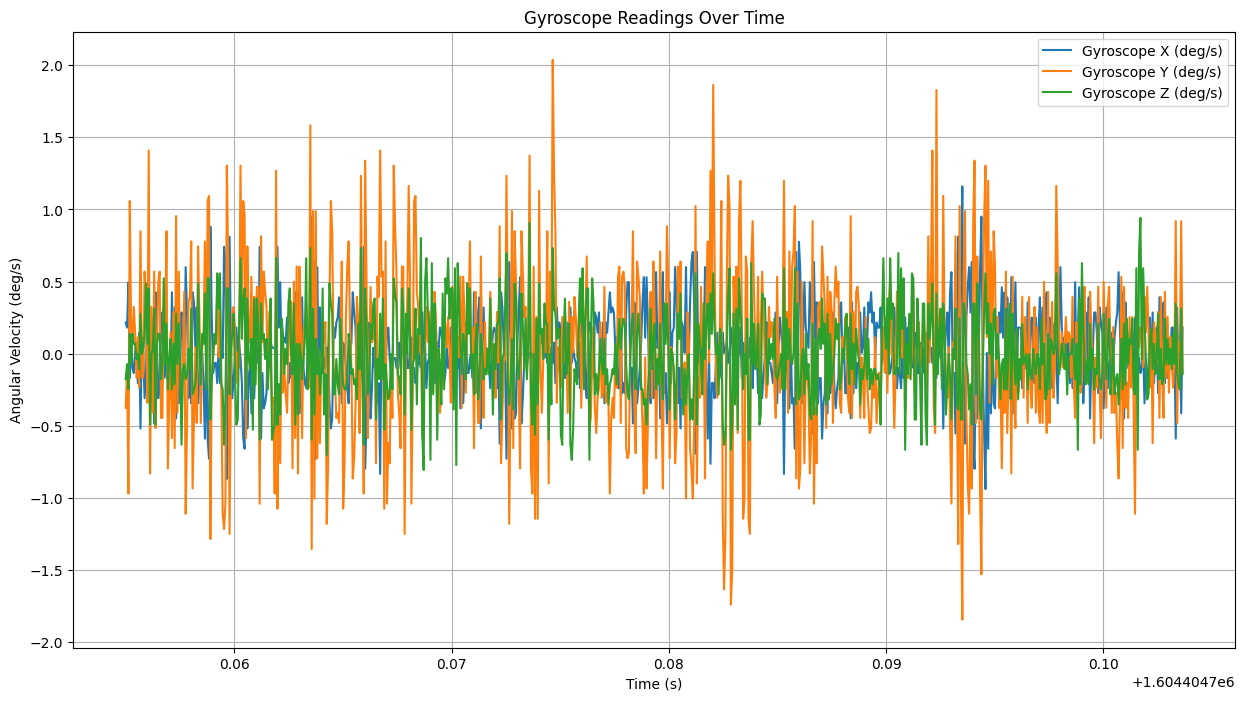

In [16]:
df.columns = [
    'timestamp_ms',
    'ax_g', 'ay_g', 'az_g',
    'roll_deg', 'pitch_deg',
    'gx_deg_s', 'gy_deg_s', 'gz_deg_s',
    'mx_gauss', 'my_gauss', 'mz_gauss'
]

df['timestamp_s'] = df['timestamp_ms'] / 1000.0

plt.figure(figsize=(15, 8))

plt.plot(df['timestamp_s'], df['gx_deg_s'], label='Gyroscope X (deg/s)')
plt.plot(df['timestamp_s'], df['gy_deg_s'], label='Gyroscope Y (deg/s)')
plt.plot(df['timestamp_s'], df['gz_deg_s'], label='Gyroscope Z (deg/s)')

plt.title('Gyroscope Readings Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.grid(True)
plt.show()

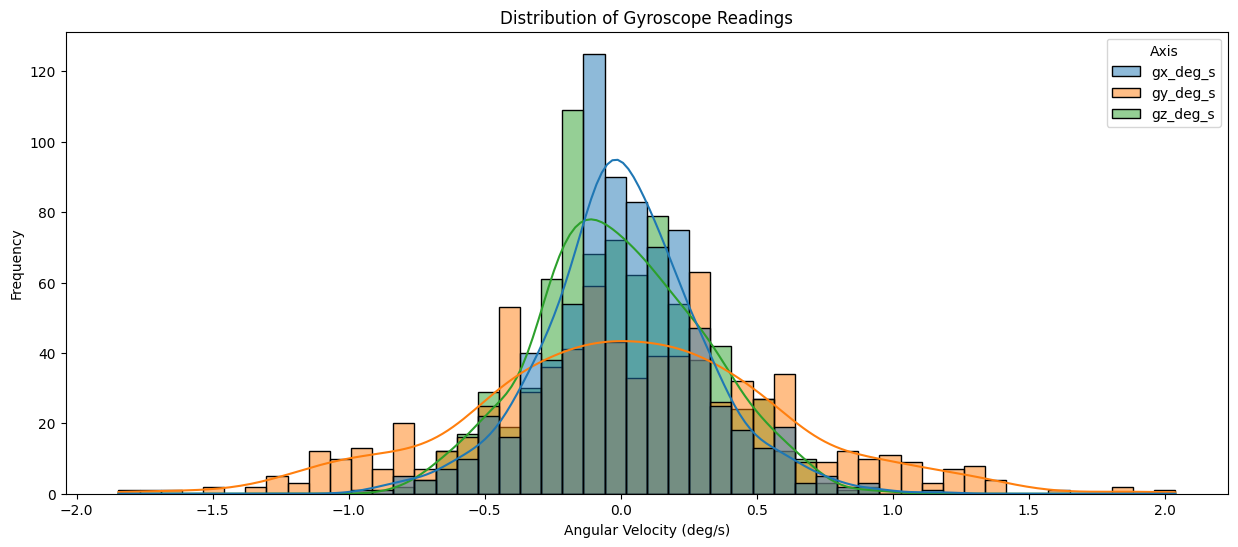

In [17]:
# Melt the DataFrame for easier plotting with seaborn
gyro_data = df.melt(id_vars=['timestamp_s'], value_vars=['gx_deg_s', 'gy_deg_s', 'gz_deg_s'],
                    var_name='Axis', value_name='Angular Velocity (deg/s)')

plt.figure(figsize=(15, 6))
sns.histplot(data=gyro_data, x='Angular Velocity (deg/s)', hue='Axis', kde=True, bins=50)
plt.title('Distribution of Gyroscope Readings')
plt.xlabel('Angular Velocity (deg/s)')
plt.ylabel('Frequency')
plt.show()

### **Task 1b**
Determine the bias and variance of the gyroscope in the IMU sensors and write down the result in your report.

In [18]:
bias = {
    'gx_deg_s': df['gx_deg_s'].mean(),
    'gy_deg_s': df['gy_deg_s'].mean(),
    'gz_deg_s': df['gz_deg_s'].mean()
}

# Calculate variance for each gyroscope axis
variance = {
    'gx_deg_s': df['gx_deg_s'].var(),
    'gy_deg_s': df['gy_deg_s'].var(),
    'gz_deg_s': df['gz_deg_s'].var()
}

print("Gyroscope Bias (Mean):")
for axis, value in bias.items():
    print(f"{axis}: {value:.6f} deg/s")

print("\nGyroscope Variance:")
for axis, value in variance.items():
    print(f"{axis}: {value:.6f} (deg/s)^2")

Gyroscope Bias (Mean):
gx_deg_s: 0.009066 deg/s
gy_deg_s: 0.016821 deg/s
gz_deg_s: -0.001386 deg/s

Gyroscope Variance:
gx_deg_s: 0.085190 (deg/s)^2
gy_deg_s: 0.327629 (deg/s)^2
gz_deg_s: 0.094201 (deg/s)^2


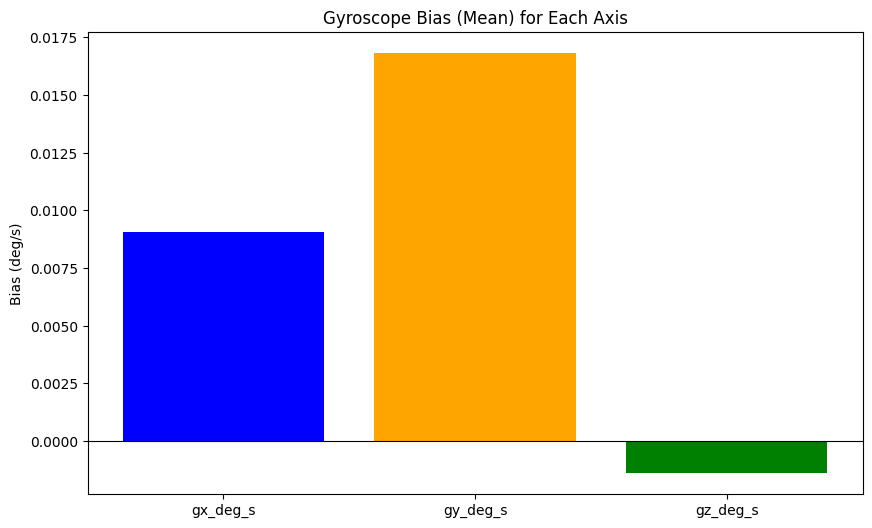

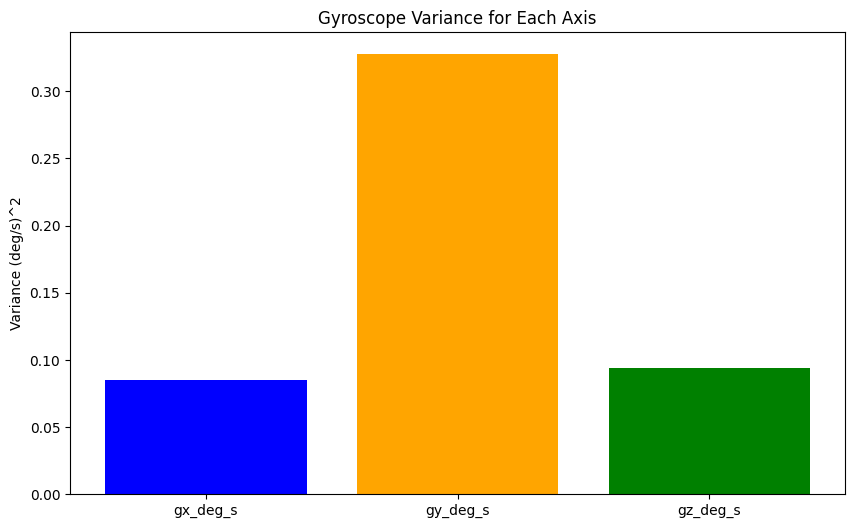

In [19]:
# Bar plot for bias
plt.figure(figsize=(10, 6))
axes = ['gx_deg_s', 'gy_deg_s', 'gz_deg_s']
bias_values = [bias[axis] for axis in axes]
plt.bar(axes, bias_values, color=['blue', 'orange', 'green'])
plt.title('Gyroscope Bias (Mean) for Each Axis')
plt.ylabel('Bias (deg/s)')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

# Bar plot for variance
plt.figure(figsize=(10, 6))
variance_values = [variance[axis] for axis in axes]
plt.bar(axes, variance_values, color=['blue', 'orange', 'green'])
plt.title('Gyroscope Variance for Each Axis')
plt.ylabel('Variance (deg/s)^2')
plt.show()

## **Task 2 - IMU calibration (accelerometer calibration)**

In [20]:
df = pd.read_csv('dataset1/data/task2/imu_calibration_task2.csv')

print(df.head())
print(df.info())

df.columns = [
    'timestamp_ms',
    'ax_g', 'ay_g', 'az_g',
    'roll_deg', 'pitch_deg',
    'gx_deg_s', 'gy_deg_s', 'gz_deg_s',
    'mx_gauss', 'my_gauss', 'mz_gauss'
]

   1605536135.53648186  0.00268400  0.02061800  1.02638600  -0.14004776  \
0         1.605536e+09   -0.000122    0.020008    1.025776     0.287279   
1         1.605536e+09    0.001586    0.020496    1.025776    -0.006209   
2         1.605536e+09   -0.029402    0.018544    1.025044    -0.118694   
3         1.605536e+09    0.001830    0.020862    1.023702    -0.090047   
4         1.605536e+09    0.000976    0.021472    1.026020     0.044077   

   -0.11000649  -0.06522250  0.67133500  -0.07124250  -0.70476469  0.94504531  \
0     0.027139     0.074777    0.181335    -0.141242    -0.704765    0.945045   
1    -0.048023     0.144778    0.076335    -0.106243    -0.696434    0.945630   
2     0.068147    -0.170222    0.566335    -0.036242    -0.696726    0.940953   
3    -0.266341     0.074777    0.356335    -0.141242    -0.696726    0.940953   
4     0.219027     0.004777    0.286335    -0.036242    -0.694972    0.947968   

   0.59660918  
0    0.596609  
1    0.597048  
2    0.601725 

Plot the data from the measurement record log file. What did you observe? Determine the gain ki and bias bi for each body axis i = {x, y, z}. Write down the results in your report.

In [21]:
df['timestamp_s'] = df['timestamp_ms'] / 1000.0

measurement_order = ['+Z', '-Z', '+X', '-X', '+Y', '-Y']
measurement_size = 6 

# Verify that the number of rows is a multiple of measurement_size
total_measurements = len(df) // measurement_size

if len(df) % measurement_size != 0:
    print("Warning: Log file does not contain complete measurement cycles.")
    total_measurements = len(df) // measurement_size

print(f"Total complete measurement cycles: {total_measurements}")

Total complete measurement cycles: 480


In [22]:
# Initialize dictionaries to store au and ad for each axis
au = {'x': [], 'y': [], 'z': []}
ad = {'x': [], 'y': [], 'z': []}

# Extract au and ad for each axis from each measurement cycle
for i in range(total_measurements):
    start_idx = i * measurement_size
    end_idx = start_idx + measurement_size
    measurement = df.iloc[start_idx:end_idx]

    # Extract readings
    # Measurement order: +Z, -Z, +X, -X, +Y, -Y
    # Each position corresponds to a rotation along an axis

    # +Z (Up position for Z axis)
    pos_up = measurement.iloc[0]
    # -Z (Down position for Z axis)
    pos_down = measurement.iloc[1]

    # +X (Up position for X axis)
    pos_up_x = measurement.iloc[2]
    # -X (Down position for X axis)
    pos_down_x = measurement.iloc[3]

    # +Y (Up position for Y axis)
    pos_up_y = measurement.iloc[4]
    # -Y (Down position for Y axis)
    pos_down_y = measurement.iloc[5]

    # For Z axis
    au['z'].append(pos_up['az_g'])
    ad['z'].append(pos_down['az_g'])

    # For X axis
    au['x'].append(pos_up_x['ax_g'])
    ad['x'].append(pos_down_x['ax_g'])

    # For Y axis
    au['y'].append(pos_up_y['ay_g'])
    ad['y'].append(pos_down_y['ay_g'])


In [23]:
# Calculate mean au and ad for each axis
mean_au = {axis: sum(au[axis]) / len(au[axis]) for axis in au}
mean_ad = {axis: sum(ad[axis]) / len(ad[axis]) for axis in ad}

print("\nMean Accelerations - Up Position (au):")
for axis in mean_au:
    print(f"{axis.upper()} axis: {mean_au[axis]:.6f} g")

print("\nMean Accelerations - Down Position (ad):")
for axis in mean_ad:
    print(f"{axis.upper()} axis: {mean_ad[axis]:.6f} g")



Mean Accelerations - Up Position (au):
X axis: 0.014831 g
Y axis: 0.026162 g
Z axis: -0.008262 g

Mean Accelerations - Down Position (ad):
X axis: 0.016181 g
Y axis: 0.025802 g
Z axis: -0.007432 g


In [24]:
# Calculate gain (ki) and bias (bi) for each axis
g = 1.0  # Gravity in g units

gain = {}
bias = {}

for axis in ['x', 'y', 'z']:
    gain[axis] = (mean_au[axis] - mean_ad[axis]) / (2 * g)
    bias[axis] = (mean_au[axis] + mean_ad[axis]) / 2

print("\nCalculated Gain (ki) for Each Axis:")
for axis in gain:
    print(f"{axis.upper()} axis: {gain[axis]:.6f}")

print("\nCalculated Bias (bi) for Each Axis:")
for axis in bias:
    print(f"{axis.upper()} axis: {bias[axis]:.6f} g")



Calculated Gain (ki) for Each Axis:
X axis: -0.000675
Y axis: 0.000180
Z axis: -0.000415

Calculated Bias (bi) for Each Axis:
X axis: 0.015506 g
Y axis: 0.025982 g
Z axis: -0.007847 g


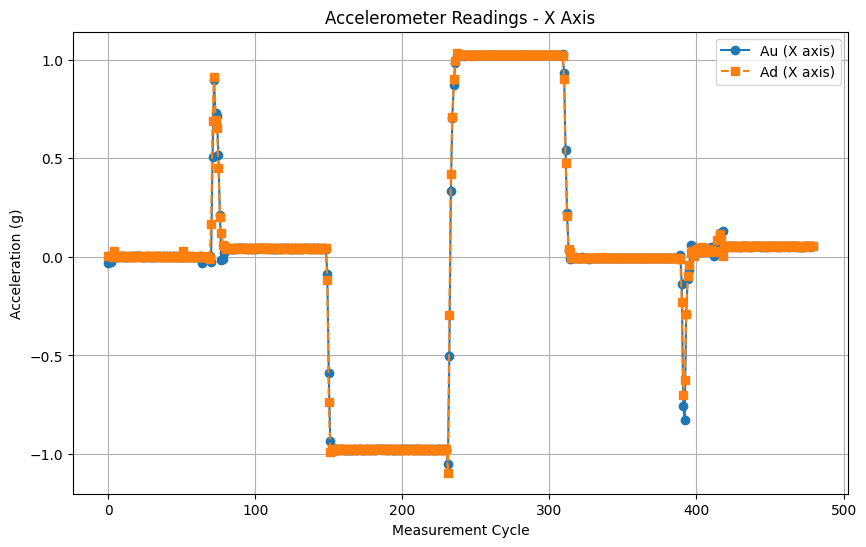

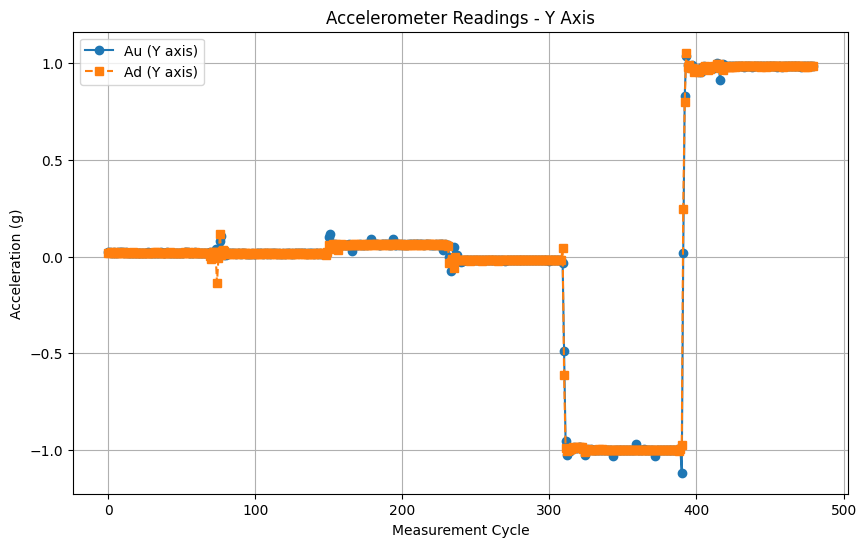

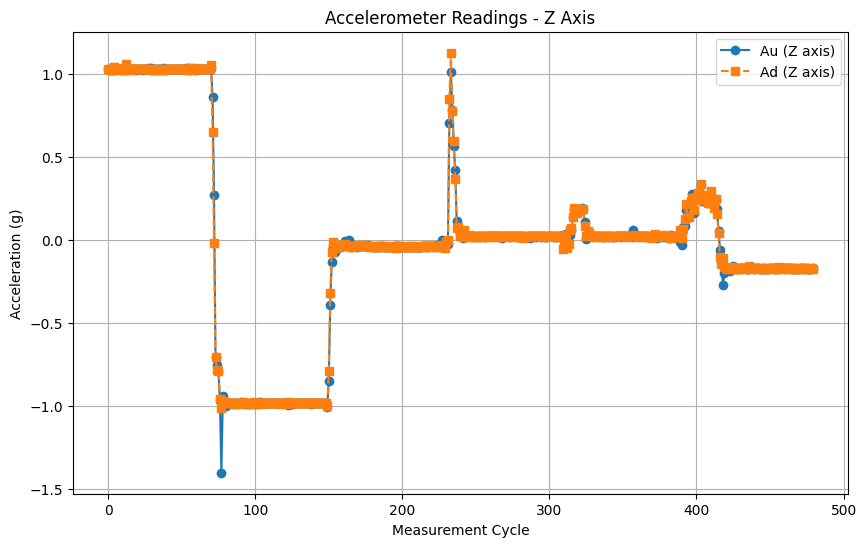

In [25]:
# Plot Accelerometer Readings for Each Axis
axes = ['x', 'y', 'z']
positions = ['Up', 'Down']

for axis in axes:
    plt.figure(figsize=(10, 6))
    plt.plot(range(total_measurements), au[axis], 'o-', label=f'Au ({axis.upper()} axis)')
    plt.plot(range(total_measurements), ad[axis], 's--', label=f'Ad ({axis.upper()} axis)')
    plt.title(f'Accelerometer Readings - {axis.upper()} Axis')
    plt.xlabel('Measurement Cycle')
    plt.ylabel('Acceleration (g)')
    plt.legend()
    plt.grid(True)
    plt.show()


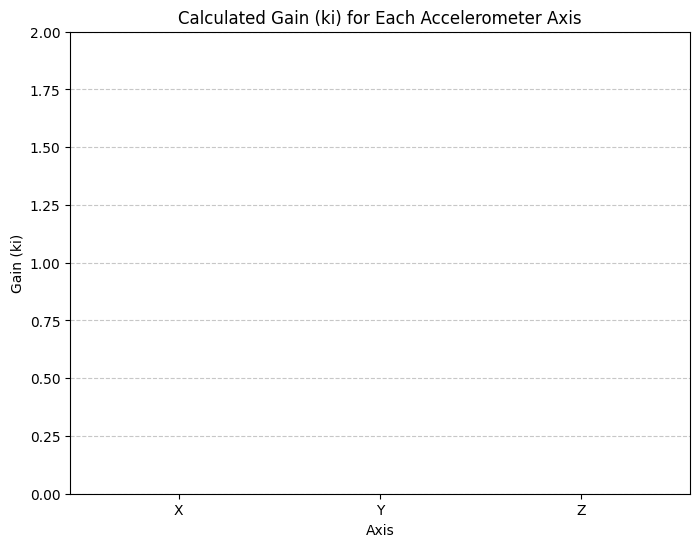

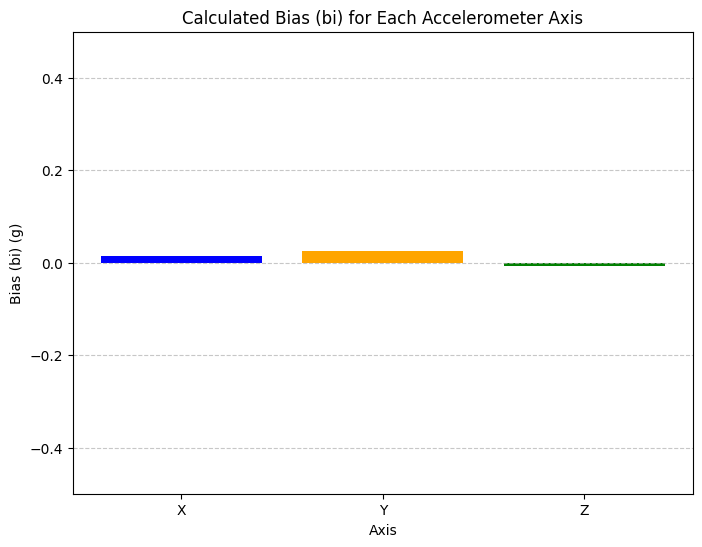

In [26]:
# Visualize Gain and Bias
# Bar plot for Gain
plt.figure(figsize=(8, 6))
gain_values = [gain[axis] for axis in axes]
plt.bar([axis.upper() for axis in axes], gain_values, color=['blue', 'orange', 'green'])
plt.title('Calculated Gain (ki) for Each Accelerometer Axis')
plt.xlabel('Axis')
plt.ylabel('Gain (ki)')
plt.ylim(0, 2)  # Adjust based on expected gain range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot for Bias
plt.figure(figsize=(8, 6))
bias_values = [bias[axis] for axis in axes]
plt.bar([axis.upper() for axis in axes], bias_values, color=['blue', 'orange', 'green'])
plt.title('Calculated Bias (bi) for Each Accelerometer Axis')
plt.xlabel('Axis')
plt.ylabel('Bias (bi) (g)')
plt.ylim(-0.5, 0.5)  # Adjust based on expected bias range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Task 3 - Camera module calibration**

In [ ]:
df = pd.read_csv('dataset1/data/task3/camera_module_calibration_task3.csv')

print(df.head())
print(df.info())